In [ ]:
using Revise, Plots, FFTW, LinearAlgebra, LaTeXStrings, Random, Distributions, ColorSchemes

In [2]:
includet("../../src/SparseSpikes.jl")
using .SparseSpikes

Define ground truth amplitudes and positions

In [4]:
domain  = [[0, 1], [0, 1]]

2-element Vector{Vector{Int64}}:
 [0, 1]
 [0, 1]

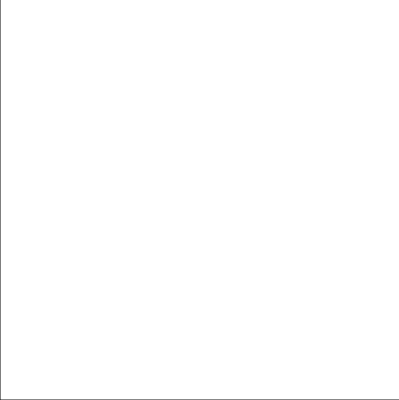

In [5]:
# Define the plot
num_points = 100

plt_grid_x1 = [domain[1][1] + i * (domain[1][2] - domain[1][1]) / num_points for j in 0:num_points, i in 0:num_points]
plt_grid_x2 = [domain[2][1] + j * (domain[2][2] - domain[2][1]) / num_points for j in 0:num_points, i in 0:num_points]

grid = range(0, stop=1, length=(num_points + 1))
plot_size = (400, 400) .* 1
using Plots.Measures
plt = heatmap(xlims=domain[1], ylims=domain[2], color=:viridis, size=plot_size, grid=false, ticks=false, margins=-2mm, cb=:none)

In [16]:
ops = gaussian_operators_2D(0.035, plt_grid_x1, plt_grid_x2)

# ops = fourier_operators_2D(6, plt_grid_x1, plt_grid_x2)

Operators(var"#ϕ#201"{Int64}(Core.Box(var"#gauss2D#200"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.01; … ; 1.0 0.99; 1.0 1.0], 408.1632653061224)), 10201), var"#Φ#202"{var"#ϕ#201"{Int64}, Int64}(var"#ϕ#201"{Int64}(Core.Box(var"#gauss2D#200"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.01; … ; 1.0 0.99; 1.0 1.0], 408.1632653061224)), 10201), Core.Box(var"#gauss2D#200"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.01; … ; 1.0 0.99; 1.0 1.0], 408.1632653061224)), 10201), var"#adjΦ#207"{Matrix{Float64}, Matrix{Float64}, var"#adjΦ#199#208"{var"#ϕ#201"{Int64}}}([0.0 0.01 … 0.99 1.0; 0.0 0.01 … 0.99 1.0; … ; 0.0 0.01 … 0.99 1.0; 0.0 0.01 … 0.99 1.0], [0.0 0.0 … 0.0 0.0; 0.01 0.01 … 0.01 0.01; … ; 0.99 0.99 … 0.99 0.99; 1.0 1.0 … 1.0 1.0], var"#adjΦ#199#208"{var"#ϕ#201"{Int64}}(var"#ϕ#201"{Int64}(Core.Box(var"#gauss2D#200"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 

## Spurious spikes for degenerate pre-certificate

In [7]:
function add_noise(y0, noise_level, seed=1)
    Random.seed!(seed)
    sigma = noise_level * norm(y0)
    w = randn(length(y0))
    w = w / norm(w) * sigma
    y = y0 + w
    return y
end

add_noise (generic function with 2 methods)

In [17]:
x0 = [[0.47, 0.53], [0.5, 0.5]]
a0 = [1.0, -1.0]

y0 = ops.Φ(x0..., a0)

μ0 = DiscreteMeasure(x0, a0)

ηV = pre_certificate(μ0, ops)

display(maximum(ηV))

1.3907166742013803

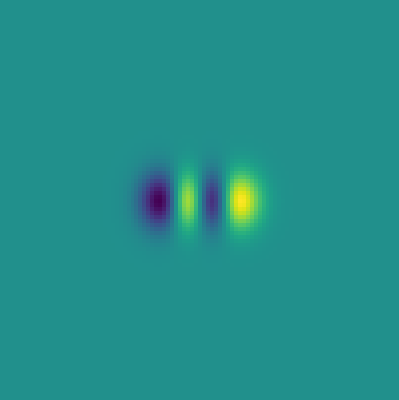

In [18]:
plt_cert = deepcopy(plt)

heatmap!(plt_cert, grid, grid, ηV ./ maximum(ηV), color=:viridis)
# scatter!(plt_cert, inset=(bbox(0, 0, 1, 1, :bottom)), bgcolor=:transparent,
#     μ0.x...,
#     zcolor=μ0.a,
#     color=cgrad(ColorSchemes.diverging_linear_bjr_30_55_c53_n256.colors),
#     legend=:none, grid=false, ticks=false,
#     label=L"μ_0", marker=:square,
#     markersize=8, markerstrokewidth=1)

SFW iterations: 100%|███████████████████████████████████| Time: 0:00:07


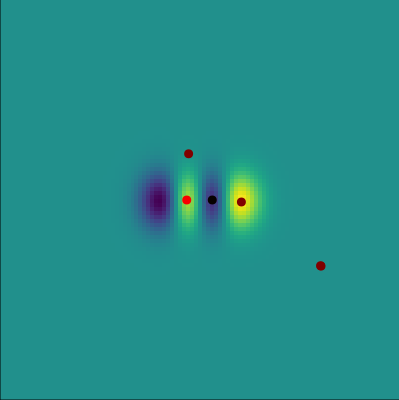

In [53]:
y = add_noise(y0, 0.001)
λ = 0.2

prob = BLASSO(y0, ops, domain, λ)
solve!(prob, :SFW, options=Dict(:maxits => 6))

plt_spurious = deepcopy(plt_cert)

red_cmap = cgrad([RGB(0, 0, 0), RGB(1, 0, 0)])

scatter!(plt_spurious, 
    inset=(bbox(0, 0, 1, 1, :bottom)), bgcolor=:transparent,
    prob.μ.x...,
    zcolor=prob.μ.a,
    color=red_cmap,
    legend=:none, grid=false, ticks=:none,
    marker=:circle,
    markersize=5, markerstrokewidth=0)

In [47]:
# prob.y = add_noise(y0, 0.05)
# prob.λ = 0.0001
prob.y = add_noise(y0, 0.1)
prob.λ = 0.09
solve!(prob, :SFW, options=Dict(:maxits => 10))

SFW iterations: 100%|███████████████████████████████████| Time: 0:00:16


BLASSO([0.00038385513632475753, 0.0017255413083220469, -0.0036928813584757685, 0.0002891918919571618, 0.006729681426115521, -0.009771447867719983, 0.0010904647364763352, 0.005363574505966195, -0.01729398199301072, -0.011726590594058665  …  -0.007363308470048308, -0.0029638011922631688, 0.009137388217546366, 0.0004000422207468165, -0.004376270906986861, -0.003934219528503117, -0.0059131757487579754, -0.007421351299981008, -0.0024006156556368183, 0.006024544603001538], Operators(var"#ϕ#201"{Int64}(Core.Box(var"#gauss2D#200"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.01; … ; 1.0 0.99; 1.0 1.0], 408.1632653061224)), 10201), var"#Φ#202"{var"#ϕ#201"{Int64}, Int64}(var"#ϕ#201"{Int64}(Core.Box(var"#gauss2D#200"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.01; … ; 1.0 0.99; 1.0 1.0], 408.1632653061224)), 10201), Core.Box(var"#gauss2D#200"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.

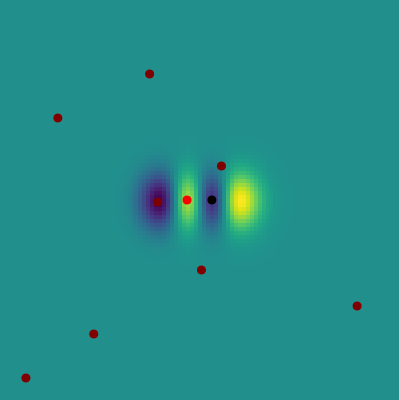

In [48]:
plt_spurious_ns = deepcopy(plt_cert)
scatter!(plt_spurious_ns, prob.μ.x...,
    zcolor=prob.μ.a,
    color=red_cmap,
    marker=:circle, label="",
    legend=:none, grid=false, ticks=:none,
    markersize=5, markerstrokewidth=0)


In [13]:
# using Plots.Measures
# plot!(plt_spurious, xaxis=false, yaxis=false, xlabel="", ylabel="", colorbar=false,
#     size=(400, 400), ratio=:equal, ticks=false, legendfontsize=12,
#     margins=0mm, right_margin=-4mm,
# )
# plot!(plt_spurious_ns, xaxis=false, yaxis=false, xlabel="", ylabel="", colorbar=false,
#     size=(400, 400), ratio=:equal, ticks=false, legendfontsize=12,
#     margins=0mm, right_margin=-4mm,
# )

In [49]:
savefig(plt_spurious, "../../figures/Spurious.svg")
savefig(plt_spurious_ns, "../../figures/PreCertificates/Spurious_noise.svg")

"c:\\Users\\ladis\\OneDrive - University of Warwick\\Year 4\\Super resolution\\Codes\\SparseSpikes\\figures\\PreCertificates\\Spurious_noise.svg"